In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
f_signal = ['/store/user/ekoenig/4BAnalysis/NTuples/feynnet/GluGluToHHTo4B/test_ntuple.root']
f_qcd = ['/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD*bEn*/test_ntuple.root','/store/user/ekoenig/4BAnalysis/NTuples/feynnet/QCD*BGen*/test_ntuple.root']
f_tt = ['/store/user/ekoenig/4BAnalysis/NTuples/feynnet/TT*/test_ntuple.root']

In [3]:
signal = ObjIter([Tree(f_signal)])
bkg = ObjIter([Tree(f_qcd), Tree(f_tt)])

100%|██████████| 1/1 [00:00<00:00,  1.51it/s]


In [4]:
(signal+bkg).apply(lambda t : t.extend(n_all_jet=t.n_jet))

[None, None, None]

In [5]:
study.quick(
    signal+bkg,
    legend=True,
    varlist=['n_all_jet'],
    xlabels=['Number of Jets'],
    binlist=[np.arange(15)],
    # lumi=None,
    efficiency=True,
)

KeyError: "Key mass not found in tree fields ['Event', 'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5', 'HLT_PFHT330PT30_QuadPFJet_75_60_45_40_TriplePFBTagDeepCSV_4p5_ObjectMatched', 'LHEPdfWeight', 'LHEPdfWeight_var0', 'LHEPdfWeight_var1', 'LHEPdfWeight_var10', 'LHEPdfWeight_var100', 'LHEPdfWeight_var101', 'LHEPdfWeight_var102', 'LHEPdfWeight_var11', 'LHEPdfWeight_var12', 'LHEPdfWeight_var13', 'LHEPdfWeight_var14', 'LHEPdfWeight_var15', 'LHEPdfWeight_var16', 'LHEPdfWeight_var17', 'LHEPdfWeight_var18', 'LHEPdfWeight_var19', 'LHEPdfWeight_var2', 'LHEPdfWeight_var20', 'LHEPdfWeight_var21', 'LHEPdfWeight_var22', 'LHEPdfWeight_var23', 'LHEPdfWeight_var24', 'LHEPdfWeight_var25', 'LHEPdfWeight_var26', 'LHEPdfWeight_var27', 'LHEPdfWeight_var28', 'LHEPdfWeight_var29', 'LHEPdfWeight_var3', 'LHEPdfWeight_var30', 'LHEPdfWeight_var31', 'LHEPdfWeight_var32', 'LHEPdfWeight_var33', 'LHEPdfWeight_var34', 'LHEPdfWeight_var35', 'LHEPdfWeight_var36', 'LHEPdfWeight_var37', 'LHEPdfWeight_var38', 'LHEPdfWeight_var39', 'LHEPdfWeight_var4', 'LHEPdfWeight_var40', 'LHEPdfWeight_var41', 'LHEPdfWeight_var42', 'LHEPdfWeight_var43', 'LHEPdfWeight_var44', 'LHEPdfWeight_var45', 'LHEPdfWeight_var46', 'LHEPdfWeight_var47', 'LHEPdfWeight_var48', 'LHEPdfWeight_var49', 'LHEPdfWeight_var5', 'LHEPdfWeight_var50', 'LHEPdfWeight_var51', 'LHEPdfWeight_var52', 'LHEPdfWeight_var53', 'LHEPdfWeight_var54', 'LHEPdfWeight_var55', 'LHEPdfWeight_var56', 'LHEPdfWeight_var57', 'LHEPdfWeight_var58', 'LHEPdfWeight_var59', 'LHEPdfWeight_var6', 'LHEPdfWeight_var60', 'LHEPdfWeight_var61', 'LHEPdfWeight_var62', 'LHEPdfWeight_var63', 'LHEPdfWeight_var64', 'LHEPdfWeight_var65', 'LHEPdfWeight_var66', 'LHEPdfWeight_var67', 'LHEPdfWeight_var68', 'LHEPdfWeight_var69', 'LHEPdfWeight_var7', 'LHEPdfWeight_var70', 'LHEPdfWeight_var71', 'LHEPdfWeight_var72', 'LHEPdfWeight_var73', 'LHEPdfWeight_var74', 'LHEPdfWeight_var75', 'LHEPdfWeight_var76', 'LHEPdfWeight_var77', 'LHEPdfWeight_var78', 'LHEPdfWeight_var79', 'LHEPdfWeight_var8', 'LHEPdfWeight_var80', 'LHEPdfWeight_var81', 'LHEPdfWeight_var82', 'LHEPdfWeight_var83', 'LHEPdfWeight_var84', 'LHEPdfWeight_var85', 'LHEPdfWeight_var86', 'LHEPdfWeight_var87', 'LHEPdfWeight_var88', 'LHEPdfWeight_var89', 'LHEPdfWeight_var9', 'LHEPdfWeight_var90', 'LHEPdfWeight_var91', 'LHEPdfWeight_var92', 'LHEPdfWeight_var93', 'LHEPdfWeight_var94', 'LHEPdfWeight_var95', 'LHEPdfWeight_var96', 'LHEPdfWeight_var97', 'LHEPdfWeight_var98', 'LHEPdfWeight_var99', 'LHEScaleWeight', 'LHEScaleWeight_var0', 'LHEScaleWeight_var1', 'LHEScaleWeight_var2', 'LHEScaleWeight_var3', 'LHEScaleWeight_var4', 'LHEScaleWeight_var5', 'LHEScaleWeight_var6', 'LHEScaleWeight_var7', 'LHEScaleWeight_var8', 'LumiSec', 'PFHT', 'PSWeight', 'PSWeight_var0', 'PSWeight_var1', 'PSWeight_var2', 'PSWeight_var3', 'PUWeight', 'PUWeight_down', 'PUWeight_up', 'Run', 'aplanarity', 'b_6j_score', 'btagSF_WP_M', 'genWeight', 'gen_H1_b1_eta', 'gen_H1_b1_genjet_eta', 'gen_H1_b1_genjet_m', 'gen_H1_b1_genjet_phi', 'gen_H1_b1_genjet_pt', 'gen_H1_b1_m', 'gen_H1_b1_phi', 'gen_H1_b1_pt', 'gen_H1_b1_recojet_eta', 'gen_H1_b1_recojet_m', 'gen_H1_b1_recojet_mRegressed', 'gen_H1_b1_recojet_phi', 'gen_H1_b1_recojet_pt', 'gen_H1_b1_recojet_ptRegressed', 'gen_H1_b2_eta', 'gen_H1_b2_genjet_eta', 'gen_H1_b2_genjet_m', 'gen_H1_b2_genjet_phi', 'gen_H1_b2_genjet_pt', 'gen_H1_b2_m', 'gen_H1_b2_phi', 'gen_H1_b2_pt', 'gen_H1_b2_recojet_eta', 'gen_H1_b2_recojet_m', 'gen_H1_b2_recojet_mRegressed', 'gen_H1_b2_recojet_phi', 'gen_H1_b2_recojet_pt', 'gen_H1_b2_recojet_ptRegressed', 'gen_H1_eta', 'gen_H1_fc_eta', 'gen_H1_fc_m', 'gen_H1_fc_phi', 'gen_H1_fc_pt', 'gen_H1_m', 'gen_H1_phi', 'gen_H1_pt', 'gen_H2_b1_eta', 'gen_H2_b1_genjet_eta', 'gen_H2_b1_genjet_m', 'gen_H2_b1_genjet_phi', 'gen_H2_b1_genjet_pt', 'gen_H2_b1_m', 'gen_H2_b1_phi', 'gen_H2_b1_pt', 'gen_H2_b1_recojet_eta', 'gen_H2_b1_recojet_m', 'gen_H2_b1_recojet_mRegressed', 'gen_H2_b1_recojet_phi', 'gen_H2_b1_recojet_pt', 'gen_H2_b1_recojet_ptRegressed', 'gen_H2_b2_eta', 'gen_H2_b2_genjet_eta', 'gen_H2_b2_genjet_m', 'gen_H2_b2_genjet_phi', 'gen_H2_b2_genjet_pt', 'gen_H2_b2_m', 'gen_H2_b2_phi', 'gen_H2_b2_pt', 'gen_H2_b2_recojet_eta', 'gen_H2_b2_recojet_m', 'gen_H2_b2_recojet_mRegressed', 'gen_H2_b2_recojet_phi', 'gen_H2_b2_recojet_pt', 'gen_H2_b2_recojet_ptRegressed', 'gen_H2_eta', 'gen_H2_fc_eta', 'gen_H2_fc_m', 'gen_H2_fc_phi', 'gen_H2_fc_pt', 'gen_H2_m', 'gen_H2_phi', 'gen_H2_pt', 'genjet_E', 'genjet_eta', 'genjet_hadronFlav', 'genjet_m', 'genjet_partonFlav', 'genjet_phi', 'genjet_pt', 'genjet_recoIdx', 'genjet_signalId', 'is_bkg', 'jet_E', 'jet_btag', 'jet_chEmEF', 'jet_chHEF', 'jet_eta', 'jet_hadronFlav', 'jet_id', 'jet_m', 'jet_mRegressed', 'jet_nConstituents', 'jet_neEmEF', 'jet_neHEF', 'jet_partonFlav', 'jet_phi', 'jet_pt', 'jet_ptRegressed', 'jet_puid', 'jet_qgl', 'jet_signalId', 'lhe_ht', 'n_ele', 'n_genjet', 'n_jet', 'n_muon', 'n_other_pv', 'n_pu', 'n_total_jet', 'n_true_int', 'ngenjet_E', 'ngenjet_eta', 'ngenjet_hadronFlav', 'ngenjet_m', 'ngenjet_partonFlav', 'ngenjet_phi', 'ngenjet_pt', 'ngenjet_recoIdx', 'ngenjet_signalId', 'njet_E', 'njet_btag', 'njet_chEmEF', 'njet_chHEF', 'njet_eta', 'njet_hadronFlav', 'njet_id', 'njet_m', 'njet_mRegressed', 'njet_nConstituents', 'njet_neEmEF', 'njet_neHEF', 'njet_partonFlav', 'njet_phi', 'njet_pt', 'njet_ptRegressed', 'njet_puid', 'njet_qgl', 'njet_signalId', 'rhofastjet_all', 'scale', 'sphericity', 'sphericity_t', 'triggerDataEfficiency', 'triggerDataEfficiencyDown', 'triggerDataEfficiencyUp', 'triggerMcEfficiency', 'triggerMcEfficiencyDown', 'triggerMcEfficiencyUp', 'triggerScaleFactor', 'triggerScaleFactorDown', 'triggerScaleFactorUp', 'sample_id', 'n_all_jet']"

In [ ]:
t4btag = CollectionFilter('jet', filter=lambda t : ak_rank(-t.jet_btag) < 6)
signal = signal.apply(t4btag, report=True)
bkg = bkg.apply(t4btag, report=True)
signal.apply(lambda t : t.extend(nfound_select=ak.sum(t.jet_signalId>-1,axis=1)))

CollectionFilter: 100%|██████████| 2/2 [00:27<00:00, 13.58s/it]


[None]

In [7]:
signal.apply(lambda t : (0.8/0.2)*ak.sum(t.nfound_select==4))

[54592.0]

In [8]:
bkg.apply(lambda t : (0.8/0.2)*len(t))

[298924.0, 2211892.0]

100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


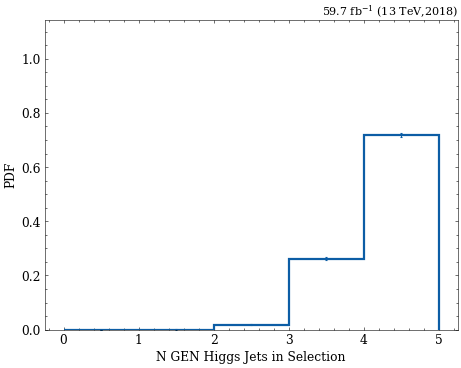

In [ ]:
study.quick(
    signal,
    varlist=['nfound_select'],
    xlabels=['N GEN Higgs Jets in Selection'],
    efficiency=True,
)

In [6]:
from utils.fourbUtils import f_load_feynnet_assignment, models

load_feynnet = f_load_feynnet_assignment(models.feynnet_etpiece.storage)

(signal+bkg).apply(load_feynnet, report=True)
(signal+bkg).apply(fourb.assign)

f_load_feynnet_assignment: 100%|██████████| 3/3 [00:10<00:00,  3.58s/it]


[None, None, None]

In [12]:
bkg.H1_m

[<Array [81.2, 243, 246, 97, ... 417, 117, 209] type='74731 * float32'>, <Array [274, 558, 85.2, ... 631, 153, 148] type='552973 * float32'>]

100%|██████████| 4/4 [00:01<00:00,  2.02it/s]


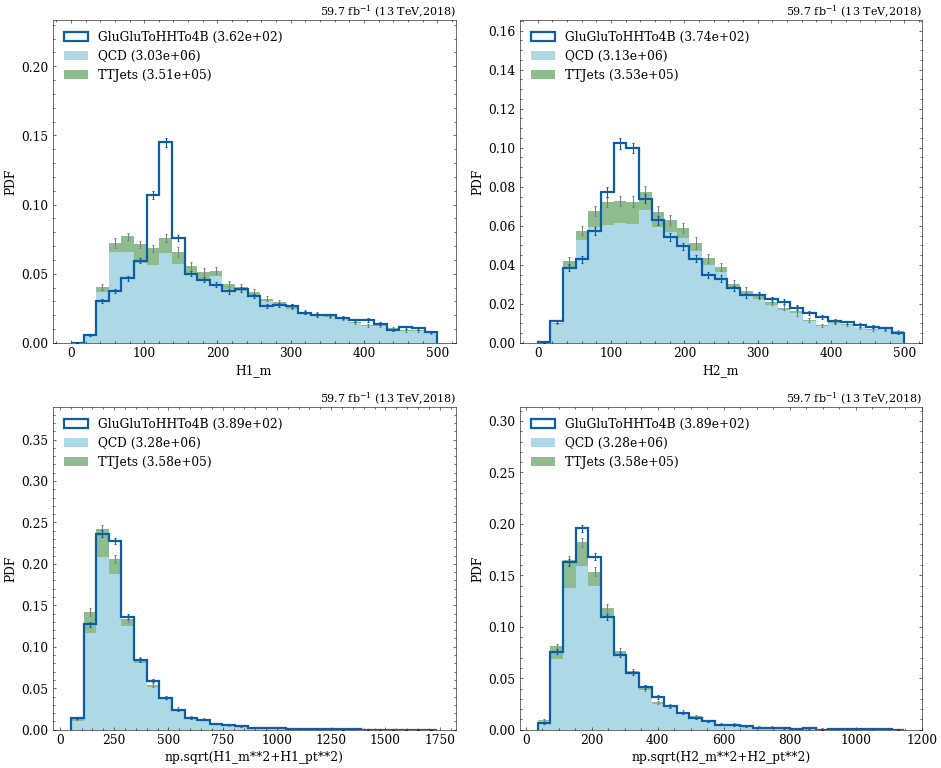

In [32]:
varinfo.H1_m = dict(bins=(0,500,30))
varinfo.H2_m = dict(bins=(0,500,30))

study.quick(
    signal+bkg,
    varlist=['H1_m','H2_m']+['np.sqrt(H1_m**2+H1_pt**2)','np.sqrt(H2_m**2+H2_pt**2)'],
    efficiency=True,
    # dim=(2,-1),
    legend=True,
)

100%|██████████| 1/1 [00:09<00:00,  9.27s/it]


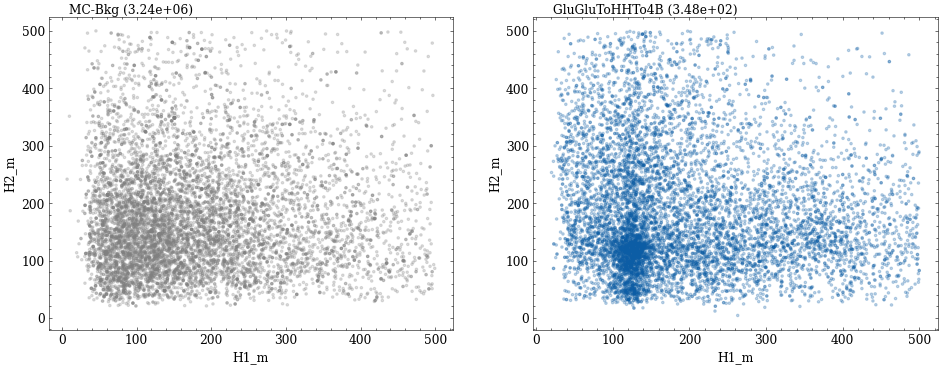

In [17]:
study.quick2d(
    signal+bkg,
    varlist=['H1_m','H2_m'],
    # binlist=[(0,500,15),(0,500,15)],
    size=(4,5),
    scatter=True,
    legend=True,
)

In [18]:
@tree_variable(xlabel='N GEN-B FeynNet')
def nfound_feynnet(t):
    return ak.sum(t.j_signalId>-1,axis=1)

@tree_variable(xlabel='N FeynNet Paired Higgs')
def nfound_feynnet_h(t):
    return ak.sum(t.h_signalId>-1,axis=1)

In [19]:
def n_feynnet_loose_btag(t):
    return ak.sum(t.j_btag>jet_btagWP[1],axis=1)

@tree_variable(xlabel='N FeynNet Medium BTag')
def n_feynnet_medium_btag(t):
    return ak.sum(t.j_btag>jet_btagWP[2],axis=1)
def n_all_medium_btag(t):
    return ak.sum(t.jet_btag>jet_btagWP[2],axis=1)
def n_feynnet_tight_btag(t):
    return ak.sum(t.j_btag>jet_btagWP[3],axis=1)

100%|██████████| 2/2 [00:00<00:00, 18.70it/s]


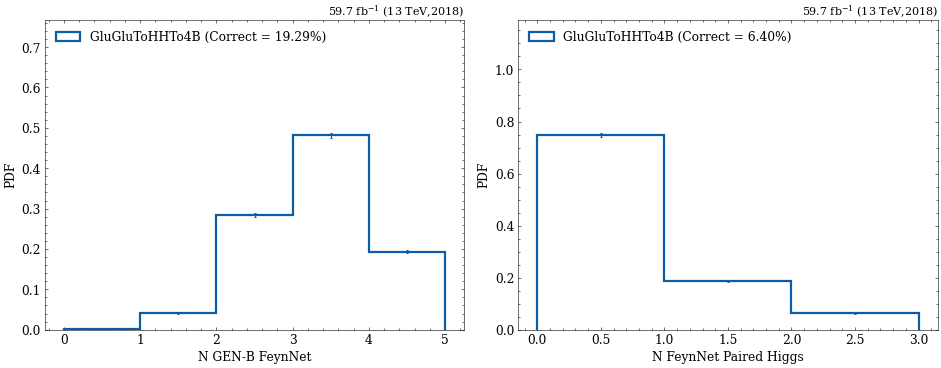

In [30]:
study.quick(
    signal,
    varlist=[nfound_feynnet,nfound_feynnet_h],
    efficiency=True,
    h_label_stat=lambda h: f'Correct = {h.histo[-1]:0.2%}',
    legend=True,
)

In [21]:
def n_gen_medium_btag(t):
    btag = t.jet_btag
    signalId = t.jet_signalId
    return ak.sum(btag[signalId>-1]>jet_btagWP[2],axis=1)

100%|██████████| 1/1 [00:00<00:00,  3.27it/s]


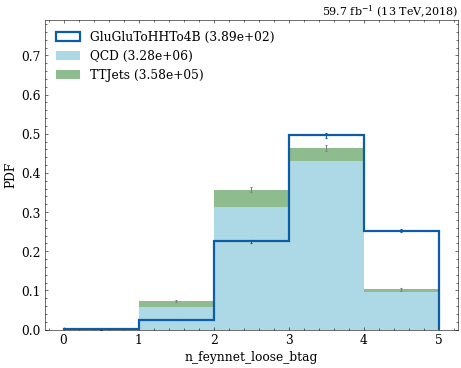

In [22]:
study.quick(
    signal+bkg,
    varlist=[n_feynnet_loose_btag],
    efficiency=True,
    legend=True,
)

100%|██████████| 2/2 [00:00<00:00,  3.06it/s]


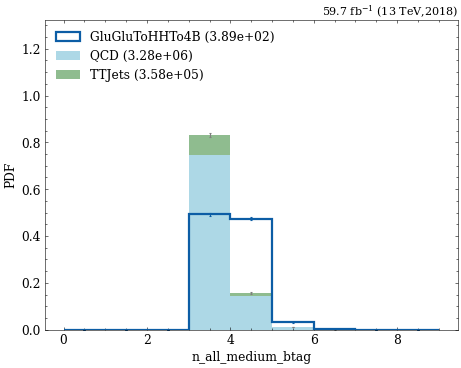

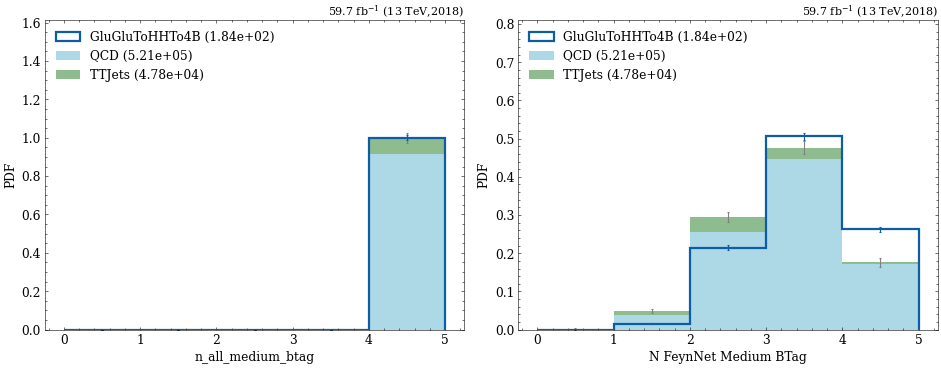

In [23]:
study.quick(
    signal+bkg,
    varlist=[n_all_medium_btag],
    efficiency=True,
    legend=True,
)

study.quick(
    signal+bkg,
    masks=lambda t : n_all_medium_btag(t)==4,
    varlist=[n_all_medium_btag, n_feynnet_medium_btag],
    efficiency=True,
    legend=True,
)

100%|██████████| 1/1 [00:00<00:00,  1.54it/s]


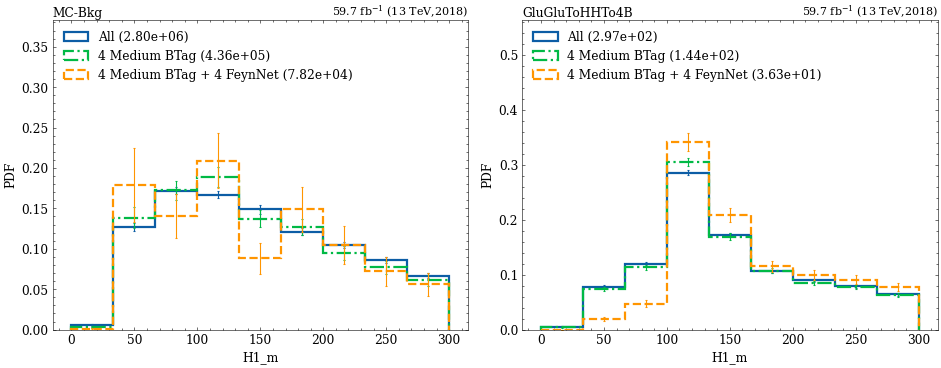

In [24]:


study.compare_masks(
    signal,bkg,
    h_color=None,
    masks=[None, lambda t : n_all_medium_btag(t)==4, lambda t : (n_all_medium_btag(t)==4)&(n_feynnet_medium_btag(t)==4)],
    label=['All', '4 Medium BTag', '4 Medium BTag + 4 FeynNet'],
    varlist=['H1_m'],
    binlist=[(0,300,30)],
    h_rebin=10,
    efficiency=True,
    legend=True,
)

100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


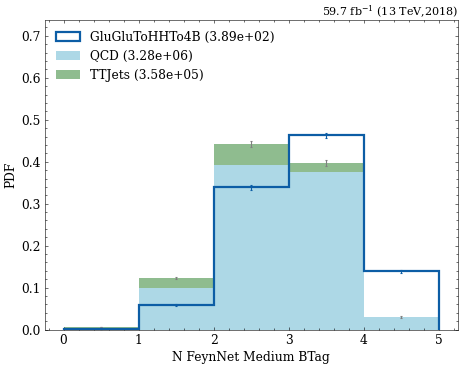

In [25]:
study.quick(
    signal+bkg,
    varlist=[n_feynnet_medium_btag],
    efficiency=True,
    legend=True,
)

100%|██████████| 1/1 [00:00<00:00, 15.20it/s]


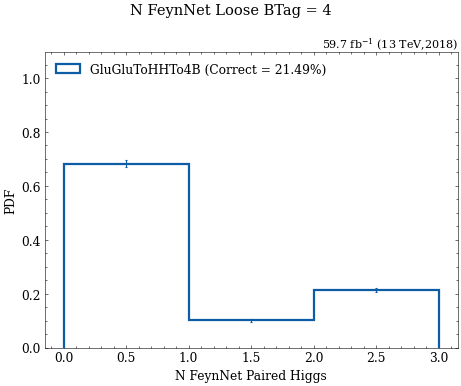

In [26]:
study.quick(
    signal,
    masks=lambda t : n_feynnet_loose_btag(t)==4,
    varlist=[nfound_feynnet_h],
    efficiency=True,
    h_label_stat=lambda h: f'Correct = {h.histo[-1]:0.2%}',
    suptitle='N FeynNet Loose BTag = 4',
    legend=True,
)

100%|██████████| 1/1 [00:00<00:00,  2.88it/s]


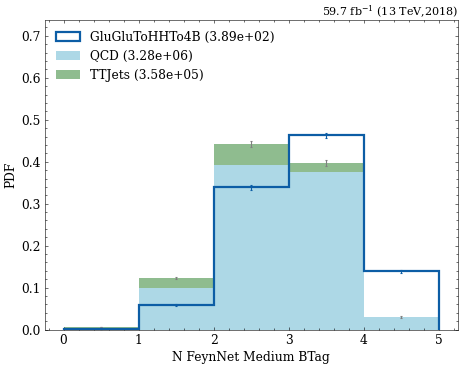

In [27]:
study.quick(
    signal+bkg,
    varlist=[n_feynnet_medium_btag],
    efficiency=True,
    legend=True,
)

100%|██████████| 2/2 [00:00<00:00,  3.46it/s]


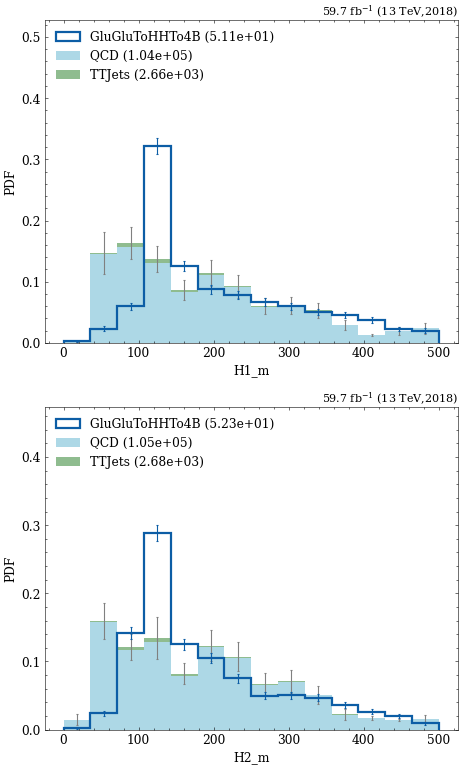

In [28]:
varinfo.H1_m = dict(bins=(0,500,30))
varinfo.H2_m = dict(bins=(0,500,30))

study.quick(
    signal+bkg,
    masks=lambda t : n_feynnet_medium_btag(t)==4,
    varlist=['H1_m','H2_m'],
    h_rebin=15,
    efficiency=True,
    dim=(2,-1),
    legend=True,
)

100%|██████████| 1/1 [00:02<00:00,  2.11s/it]


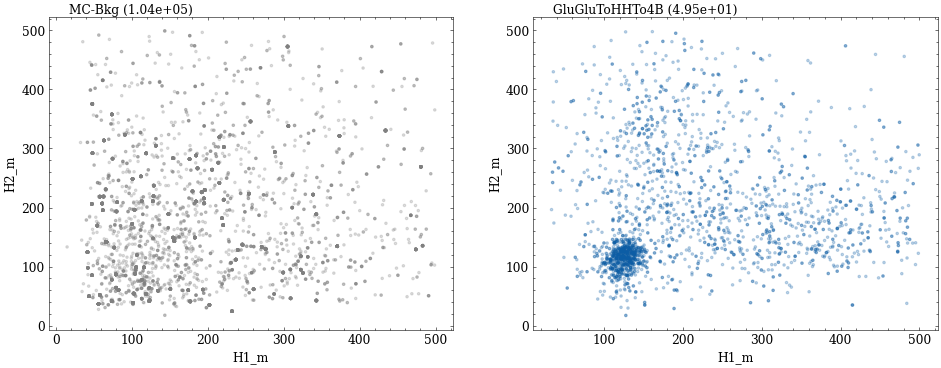

In [29]:
study.quick2d(
    signal+bkg,
    masks=lambda t : n_feynnet_medium_btag(t)==4,
    varlist=['H1_m','H2_m'],
    # binlist=[(0,500,15),(0,500,15)],
    size=(4,5),
    scatter=True,
    # interp=True,
    legend=True,
)